In [1]:
import json
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt
import string
import statistics
from difflib import SequenceMatcher

In [2]:
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def helper(gray):
    gray = ((gray/255)**20 * 255).astype(np.uint8)
    plt.imshow(gray)
    plt.show()
    blur = cv2.GaussianBlur(gray, (3,3), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
    invert = 255 - opening
#     plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
#     plt.show()
    data = pytesseract.image_to_string(thresh, lang='eng', config='--psm 6')
#     print(data, "\n=======")
    allowed = string.ascii_uppercase+string.ascii_lowercase + " ?"
    lines = data.split("\n")
    res = []
    for line in lines:
        t = []
        correct = 0
        for i in line:
            if i in allowed:
                t.append(i)
                correct+=1
            elif i in "1234567890":
                t.append(i)
            elif len(t) > 0 and t[-1] != " ":
                t.append(" ")
        if correct > len(line)*3/5 and correct > 2:
            res.append("".join(t))
    data = "\n".join(res)
    return data

def process(image):
    gray = get_grayscale(img)
    a = helper(gray)
    return a

---------------------------------------
Actual Text
its their character not their color that matters
---------------------------------------
Tesseract Prediction 
its their Character
~ =
Y
a
Ps
Estee \\
iets PLT
that matters

---------------------------------------


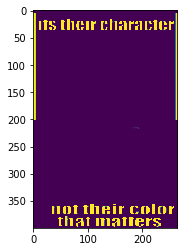

Output Text 
their 
hot their color
that matters
---------------------------------------
Tesseract Ratio = 0.6306306306306306
Our Ratio = 0.7951807228915663



0
---------------------------------------
Actual Text
don't be afraid to love again everyone is not like your ex
---------------------------------------
Tesseract Prediction 
Hlommnerainaid to fove
ava oy
if :
A y
anemia nace
WOUREK

---------------------------------------


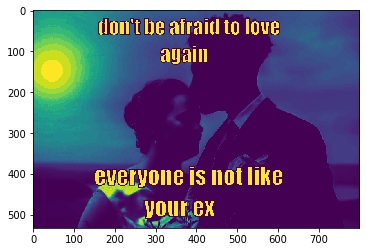

Output Text 
flon t be afraid to love
 again
everyone is not like
 MONT EX
---------------------------------------
Tesseract Ratio = 0.37606837606837606
Our Ratio = 0.8235294117647058



1
---------------------------------------
Actual Text
putting bows on your pet
---------------------------------------
Tesseract Prediction 
Iii Hows OLVOM Det
Pat
~ 2

---------------------------------------


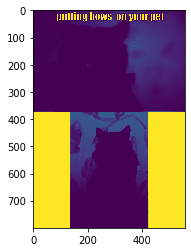

Output Text 
putting hows on your pet
---------------------------------------
Tesseract Ratio = 0.34615384615384615
Our Ratio = 0.9583333333333334



2
---------------------------------------
Actual Text
i love everything and everybody! except for squirrels i hate squirrels
---------------------------------------
Tesseract Prediction 
Thome ere NI aMeaioc
pai :
="
- -
a ee ~~
\ ry
G : ' >)
ji oP i r é a .
y Ng Qe =, >
s } 4 ” a yi
he mw ,
is 4 ~~:
except for squirrels 1 hate'squinels

---------------------------------------


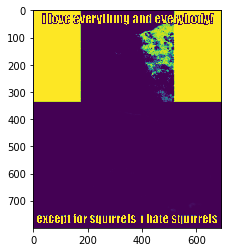

Output Text 
iMlovereverything and evenybordy 
except for squirrels ihate squirrels
---------------------------------------
Tesseract Ratio = 0.42152466367713004
Our Ratio = 0.9285714285714286



3
---------------------------------------
Actual Text
everybody loves chocolate chip cookies, even hitler
---------------------------------------
Tesseract Prediction 
LATA tS aaa
u yd A 4
~ chip cookies, even hitler

---------------------------------------


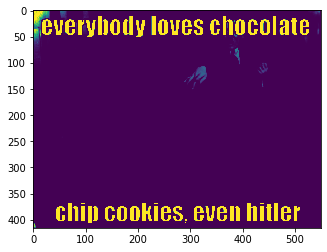

Output Text 
reveryhotly loves chocolate
 Chip cookies  even hitler
---------------------------------------
Tesseract Ratio = 0.594059405940594
Our Ratio = 0.8952380952380953



4
---------------------------------------
Actual Text
go sports! do the thing! win the points!
---------------------------------------
Tesseract Prediction 
‘ou
Re bP q r ‘¥ © a
yo sporisialo the thing? winthe |

---------------------------------------


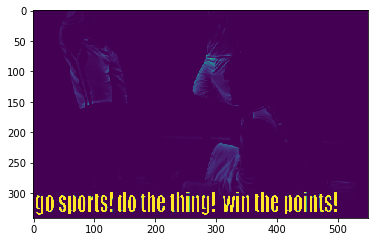

Output Text 
go sports  tlo the thing  win the points 
---------------------------------------
Tesseract Ratio = 0.5416666666666666
Our Ratio = 0.8888888888888888



5
---------------------------------------
Actual Text
fine you're right. now can we fucking drop it?
---------------------------------------
Tesseract Prediction 
ig Nw, Wins Pi. => .
° 4 Na

eo a Se p f RG
a ; ee Oi ¢ be Ae ay
Mee tein eee
Rata 6 EC) OD Te Ate ty

---------------------------------------


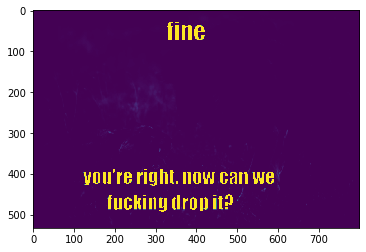

Output Text 
fine
you re right  now can we
fucking drop ii?
---------------------------------------
Tesseract Ratio = 0.18791946308724833
Our Ratio = 0.8913043478260869



6
---------------------------------------
Actual Text
tattoos are bad for your health i know 5 million people that had tattoos and they all died
---------------------------------------
Tesseract Prediction 
lalloostarealmomyourhie alt
- F
| t 7 i \ \
/ / \\
; / \
iithow 5 miiton CUE a eos and fey all died

---------------------------------------


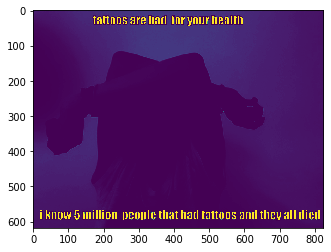

Output Text 
tattoos are hat for your health
iknow 9 million people that had tattoos ant they all died
---------------------------------------
Tesseract Ratio = 0.5235602094240838
Our Ratio = 0.9385474860335196



7
---------------------------------------
Actual Text
how long can i run? till the chain tightens
---------------------------------------
Tesseract Prediction 
howlongjcanirun?
(Ae -_
y ve }
; : hy. a
till the chaintightens

---------------------------------------


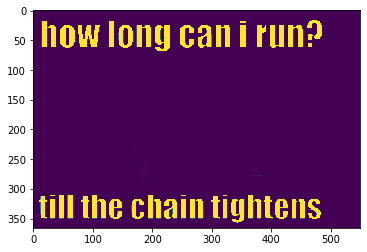

Output Text 
how long canirun?
till the chain tightens
---------------------------------------
Tesseract Ratio = 0.7037037037037037
Our Ratio = 0.9523809523809523



8
---------------------------------------
Actual Text
what is he hiding? we need to see his tax returns! let me stop you right there hillary you deleted 30,000 emails, used bleach bit on hard drives, then destroyed phones with hammers you have no right to talk about people hiding anything truth uncensored
---------------------------------------
Tesseract Prediction 
PEST Ee
OE
Ay

---------------------------------------


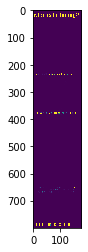

Output Text 
whatis he hiding?
220 1 hs Las Pe
Due ou gateoe tionetane
Init micensarell
---------------------------------------
Tesseract Ratio = 0.02247191011235955
Our Ratio = 0.22085889570552147



9
---------------------------------------
Actual Text
jew mad? get fuhrerious!
---------------------------------------
Tesseract Prediction 
aC ET EY
He fuhrerious!
pea

---------------------------------------


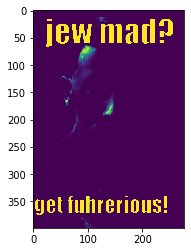

Output Text 
jew mad?
get fuhrerious 
---------------------------------------
Tesseract Ratio = 0.49056603773584906
Our Ratio = 0.9166666666666666



10
---------------------------------------
Actual Text
removes polish with chemicals, nobody bats an eye
---------------------------------------
Tesseract Prediction 
CEMOUGS DOWISH I CHainicals, ODOWY ats an
<— os Se
“ Cl i aes SS eS P 2
Bs = _ — s
" - p .
Are — ‘ yy y

---------------------------------------


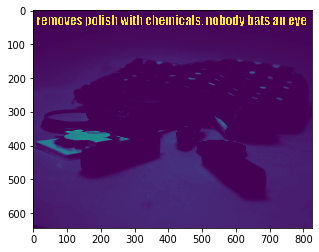

Output Text 
removes polish with chemicals  nobotly hats an eye
---------------------------------------
Tesseract Ratio = 0.24675324675324675
Our Ratio = 0.9292929292929293



11
---------------------------------------
Actual Text
brother... a day without a blast is a day wasted
---------------------------------------
Tesseract Prediction 
ae 4
— A
Bi f -
A a :
Fah 7
Ree SS
PF cco teensy |

---------------------------------------


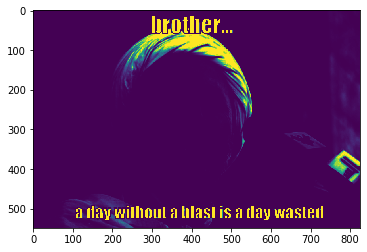

Output Text 
hrother 
a I
a tay without a blast is a day wastetl
---------------------------------------
Tesseract Ratio = 0.14
Our Ratio = 0.8484848484848485



12
---------------------------------------
Actual Text
when you're the only dog left at the dog shelter and the black family wants to adopt you
---------------------------------------
Tesseract Prediction 
pen ee ine) ol A ailne
ify elterfancthelhlackiamilywants:
i ee ee
AS = x Ee Gre S
) Pap ON f
| ia
; “fe

---------------------------------------


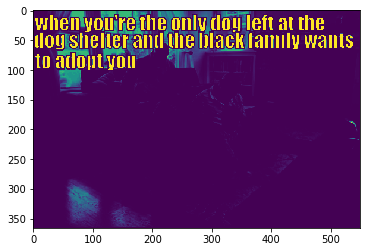

Output Text 
whettyoiirene only  dod left at the
dousheltgrant the black family wants
toatontyou  7
---------------------------------------
Tesseract Ratio = 0.41450777202072536
Our Ratio = 0.7931034482758621



13
---------------------------------------
Actual Text
voting for hillary is like letting casey anthony watch your kids because she's not guilty
---------------------------------------
Tesseract Prediction 
PAT CS
re
Me & a
a
ote A
oi EUG EIU GLULL
"
he
aa a
‘ = S
re N ss
é
« p el :
_
UES SITES DOTA) 3

---------------------------------------


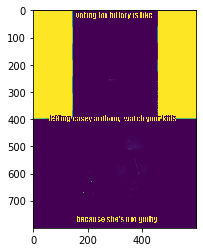

Output Text 
feltimpcasey anthony watch youpPkils
hecatse she s not guilty
---------------------------------------
Tesseract Ratio = 0.18181818181818182
Our Ratio = 0.6533333333333333



14
---------------------------------------
Actual Text
they will soon be free
---------------------------------------
Tesseract Prediction 
; ee ee pa
acy So 5 ' a JAG
wa: , \
b
/ wy
' Tey cso 2am

---------------------------------------


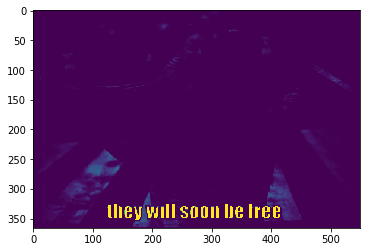

Output Text 
they will soon he tree
---------------------------------------
Tesseract Ratio = 0.15
Our Ratio = 0.9090909090909091



15
---------------------------------------
Actual Text
is it ok for your son or daughter to call another man "daddy?
---------------------------------------
Tesseract Prediction 
STON Tor MOU SOD or Ganong
~» lo Call anotier Man “Cade
1%
H ‘
- Ks ee \
—<—S) Si
NS
y

---------------------------------------


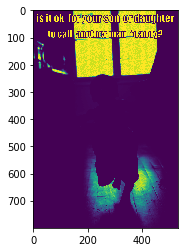

Output Text 
isit ok fonvournsonfontanghter
to call fanothenmanwetkadty?
i ?
ry E
---------------------------------------
Tesseract Ratio = 0.4161073825503356
Our Ratio = 0.6821705426356589



16
---------------------------------------
Actual Text
most religions are religions of peace
---------------------------------------
Tesseract Prediction 
lare\
ay Se
\e\ WA
ai |
CC ZB
TALES ELH

---------------------------------------


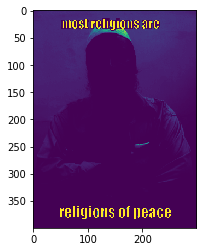

Output Text 
most religigns are
religions of peace
---------------------------------------
Tesseract Ratio = 0.23076923076923078
Our Ratio = 0.9459459459459459



17
---------------------------------------
Actual Text
when you find out there's an opening for the role of first lady
---------------------------------------
Tesseract Prediction 
Whenivourindlountheres amopenimagionte
HOBOS AY
—-_ —

---------------------------------------


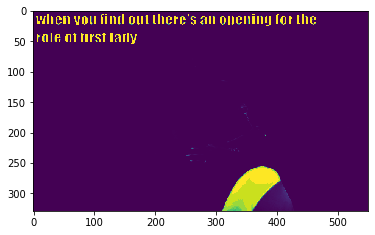

Output Text 
when you find out there s an opening for the
role of tirstlatly
---------------------------------------
Tesseract Ratio = 0.4406779661016949
Our Ratio = 0.9206349206349206



18
---------------------------------------
Actual Text
if people reject me because i stand on the truth then i have no problem walking alone
---------------------------------------
Tesseract Prediction 
PCS La ae
" | SETURL MI eas
ee Str
ne ae
emo Te
WL CELT

---------------------------------------


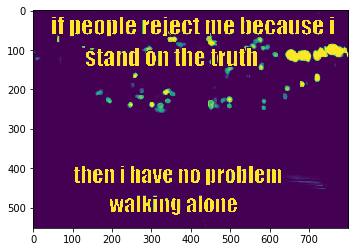

Output Text 
if people reject me because 
Stand dn the truth  ee
e e 8
 oT age et  
then i have no problem
walking alone
---------------------------------------
Tesseract Ratio = 0.18309859154929578
Our Ratio = 0.8333333333333334



19
---------------------------------------
Actual Text
from the bottom of my heart i would like to sincerely apologize..... for being white
---------------------------------------
Tesseract Prediction 
HOMERIC CTT TUN CUTTREN RSIS eco
(or ising mtg

---------------------------------------


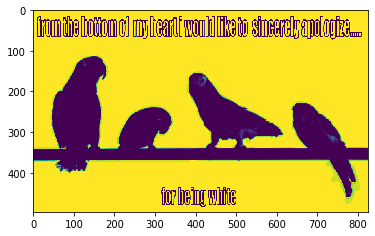

Output Text 
HOM MERVOMCMOMNME AAA CUTE KEORSIVGE TE MAO Ea
HOMEATOANTITG
---------------------------------------
Tesseract Ratio = 0.13636363636363635
Our Ratio = 0.08333333333333333



20
---------------------------------------
Actual Text
lets erect a memorial to all the americans murdered by an illegal alien make it 1,500 miles long 30 feet tall and put it on the southern border
---------------------------------------
Tesseract Prediction 
letsjerectiamemorial tofaliitieramenteans)
q muriered hy anilegal 4
; a wD ie
Jae i. ~
‘ 7
ig 3S & \
TEC EL UMC RU eel
SEU TRUE ol?

---------------------------------------


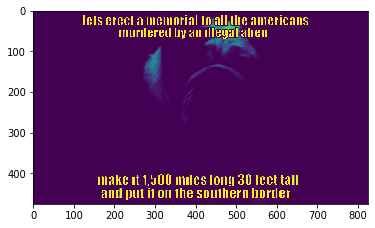

Output Text 
lets erect a memorial to all the americans
inurdered hy an illegatatien
make it 1 500 miles long 30 feet tall
and putiton the southern border
---------------------------------------
Tesseract Ratio = 0.5072463768115942
Our Ratio = 0.9295774647887324



21
---------------------------------------
Actual Text
just because they do this dosen't mean they'll do this
---------------------------------------
Tesseract Prediction 
IIstincasaiien doin

SS ——— = 3
No “J POY ™ .

ey =

vii “s

. a
il ¥ 1 anf
(WOU

---------------------------------------


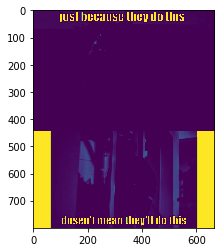

Output Text 
just hecatise they to this
dosen t mean they ll do this 
---------------------------------------
Tesseract Ratio = 0.23529411764705882
Our Ratio = 0.8727272727272727



22
---------------------------------------
Actual Text
if there is no race it can't be homicide
---------------------------------------
Tesseract Prediction 
‘im
ARRON Ua te

---------------------------------------


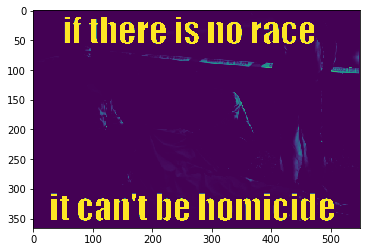

Output Text 
lf there is no race
it can t be homicide
---------------------------------------
Tesseract Ratio = 0.14035087719298245
Our Ratio = 0.925



23
---------------------------------------
Actual Text
here's to all my friends who never post about politics or religion
---------------------------------------
Tesseract Prediction 
herejsito ends
> E> a a. a ei
n=
Fe |  / ee =, ”
who never postabout
politics or religion

---------------------------------------


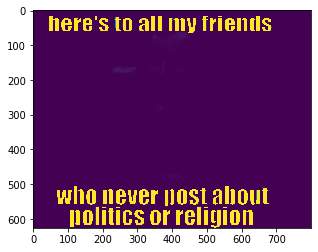

Output Text 
here s to all my friends
who never post about
politics or religion
---------------------------------------
Tesseract Ratio = 0.6624203821656051
Our Ratio = 0.9545454545454546



24
---------------------------------------
Actual Text
enjoying a day at the beach
---------------------------------------
Tesseract Prediction 
GE]
y a a
t,o fe
! ee (es
as | ; /
eT (UD [BAe es

---------------------------------------


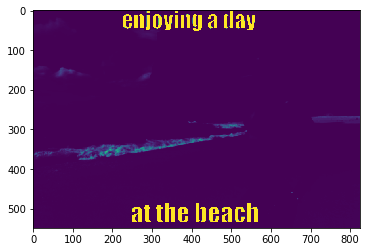

Output Text 
enjoying a day
al the beach
---------------------------------------
Tesseract Ratio = 0.28205128205128205
Our Ratio = 0.9259259259259259



25
---------------------------------------
Actual Text
when you come home from a long day of suicide bombinb and your wife gives you this look
---------------------------------------
Tesseract Prediction 
OTe TC)
ALOE PSUR TUT TL)
eR.
as y 3 \
a ned »
a | tee :
pa “
and younwiegwesyvouthis look

---------------------------------------


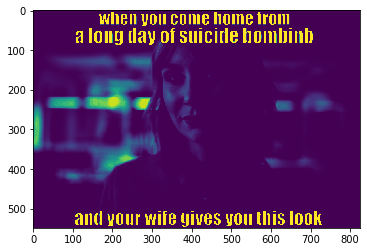

Output Text 
when you come home from
along day of suicide bombin
s  auk e
ald your wife gives you this look
---------------------------------------
Tesseract Ratio = 0.3687150837988827
Our Ratio = 0.9171270718232044



26
---------------------------------------
Actual Text
is bribing muslims for liberal votes justin trudeau's only skill? why does justin trudeau love foreigners so much while openly disrespecting canadians, canadian values, our history and traditions, our seniors and veterans? sharia law has no place in canada! never has... never will.
---------------------------------------
Tesseract Prediction 
DPS is bribing mustims for, Tt a
' TO S Justin trutieauis only CUE
-
at _ a a ©
Je ee
<= _-_ i ag
‘igo os
- eet es 7
y 2. ae ; ~%
: . ~ —_—
a ao m
—T :
Rea be Ms
J
d -
. | |
—
rs
why does justin trudeau love foreigners so mc
Ca distéspecting canatians, canadian values, our
TSMC UM OR PIN i
SET ECU SUEUR ED
never has... never will. "

---------------------------------------


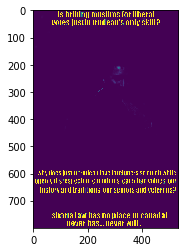

Output Text 
is hrihing muslims for liberal
votes justin trudeau s only Skill?
why toes justin trudeau love foreigners so much while
Ohenly tlisrespecting canatians  canatian values  our
history ant traditions  ollr seniors and veterans?
sharta law has no place in canatla 
never has  never will 
---------------------------------------
Tesseract Ratio = 0.2297734627831715
Our Ratio = 0.035398230088495575



27
---------------------------------------
Actual Text
when they take too long to blow out the candle
---------------------------------------
Tesseract Prediction 
LP are CO
ye if ELT ae]
iF ES F
») a
= , re

LY
LOD MT reat TC

---------------------------------------


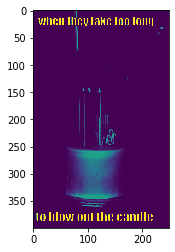

Output Text 
when  lake too long 
 if
to How out the canile
---------------------------------------
Tesseract Ratio = 0.18181818181818182
Our Ratio = 0.8260869565217391



28
---------------------------------------
Actual Text
one simple question why are we letting one man systematically destroy our nation before our eyes? answer mitch mcconnell
---------------------------------------
Tesseract Prediction 
onelsimplequestion
f
= \
whyarewellettingione
Mmansystematicallydlestroy
Ournnation|hetorejoureyes>

---------------------------------------


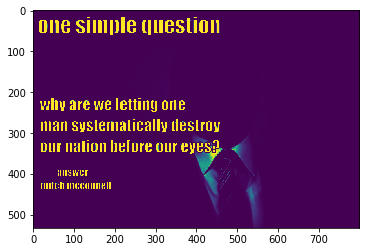

Output Text 
one simple question
why are we letting one
man systematically destroy
our nation before our a 4
answer
Iniich meconnell 
---------------------------------------
Tesseract Ratio = 0.7149321266968326
Our Ratio = 0.9



29
---------------------------------------
Actual Text
d.j. osama spin laden droppin' beats like the twin towers
---------------------------------------
Tesseract Prediction 
“ ij.osdnasiimatien | =
el a Be
eet ne
Seach ae B=

- Vi) i

= A | ee ad
S BAAS ne ees a]
Be he ae
fe g£ Peg sat ee as ae
aan Ig 0a — ep
NM ITE SAUL CH tee NR es

---------------------------------------


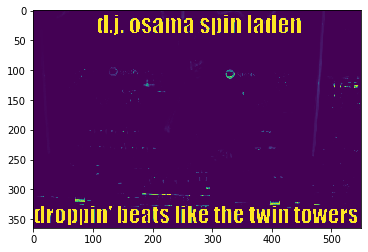

Output Text 
Lj  osama spin laden
droppin  heats like the twin towers
---------------------------------------
Tesseract Ratio = 0.24545454545454545
Our Ratio = 0.9026548672566371



30
---------------------------------------
Actual Text
move to new york they said it'll be fun they said
---------------------------------------
Tesseract Prediction 
DINE OTST ULM CU SL
é Mae ‘
4 | + ; |
1h ting, -<
i r . ny
Y ;

---------------------------------------


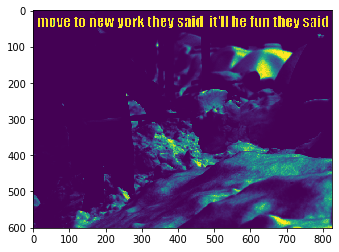

Output Text 
move to new york they said it ll be fun they said
e  Y 
TRY
 fam 
 gy tees
 SA 
 as 5 cn a 
rg et 
 a  SS x
---------------------------------------
Tesseract Ratio = 0.10619469026548672
Our Ratio = 0.6153846153846154



31
---------------------------------------
Actual Text
my sandwich-maker is very slow today
---------------------------------------
Tesseract Prediction 
5 Aan Wig
my sandwich-maker y i i |
7 (ye Se eS
; yy ,
Oren ——

---------------------------------------


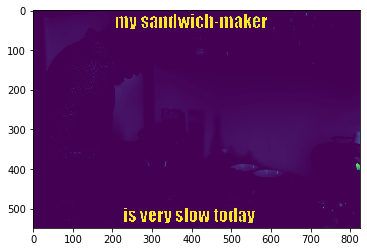

Output Text 
ny sandwich maker
is very slow totlay
---------------------------------------
Tesseract Ratio = 0.44
Our Ratio = 0.8767123287671232



32
---------------------------------------
Actual Text
when you accidentally fall in the toilet
---------------------------------------
Tesseract Prediction 
ead tT Abe
See WR ¥!
a

---------------------------------------


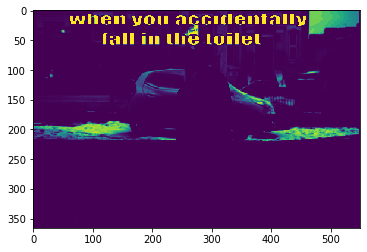

Output Text 
when you agcidentally a
 fallin te toilet
---------------------------------------
Tesseract Ratio = 0.21875
Our Ratio = 0.9135802469135802



33
---------------------------------------
Actual Text
two woman walking home together after a nice day out together
---------------------------------------
Tesseract Prediction 
tn nat rth Pa

ie ETT) ae zu etlier

‘ y f T

] Ro
| )

#4 MUM Urea

---------------------------------------


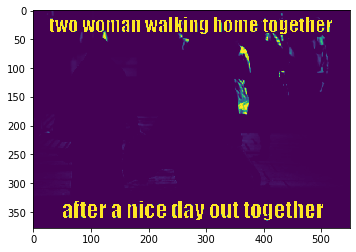

Output Text 
two woman walking home quether
after a nice day out together
---------------------------------------
Tesseract Ratio = 0.26153846153846155
Our Ratio = 0.9421487603305785



34
---------------------------------------
Actual Text
texas churches be like... pew pew pew
---------------------------------------
Tesseract Prediction 
6 temas churches [be [ike...
re
sy - ,
nf
i 7 Lp \
2 ’ | ae
ee HAA De

---------------------------------------


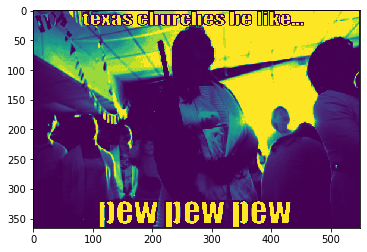

Output Text 
7 ant
pew pew pew
---------------------------------------
Tesseract Ratio = 0.5185185185185185
Our Ratio = 0.4444444444444444



35
---------------------------------------
Actual Text
i don't always have a heat stroke and get frostbite in the same week but when i do i know i'm in kentucky
---------------------------------------
Tesseract Prediction 
- od
TEESE rT Le OC) Ca
and get frosthite in the same week *
, Fr js!
\ Sah ri
-a
TAY CU
Fg 7 “ae ee

LCT aL in kentucky

---------------------------------------


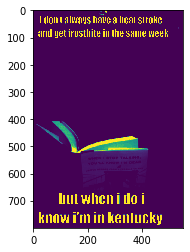

Output Text 
itlon t always have aheat stroke
atid get frostbite in the same week
xy 
hut when ido
know rm in kentucky
---------------------------------------
Tesseract Ratio = 0.5110132158590308
Our Ratio = 0.8761904761904762



36
---------------------------------------
Actual Text
doesn't wear tampons because she trips over the string
---------------------------------------
Tesseract Prediction 
HOESHitiWeantamponsibecause)
SIG TINS Olartiie Siig
a a

LB

Watlin <r ZV

---------------------------------------


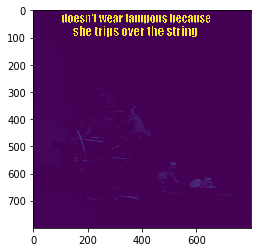

Output Text 
doesn t wear tampons hecause
She trips over the string
---------------------------------------
Tesseract Ratio = 0.3875968992248062
Our Ratio = 0.9259259259259259



37
---------------------------------------
Actual Text
when you can't decide to pre heat the oven or just throw the meal in right away
---------------------------------------
Tesseract Prediction 
MHD TON cantdaciie to Dralisat the oven
| . |
| rl —  F
or just throw the meal in right ane

---------------------------------------


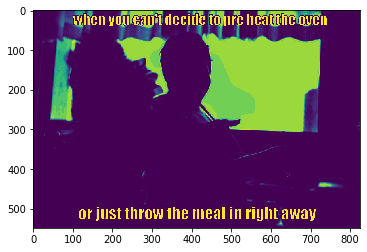

Output Text 
wien youteanit tlecitie ojure heaqgihetoven
or just throw the meal in right away
---------------------------------------
Tesseract Ratio = 0.6976744186046512
Our Ratio = 0.8176100628930818



38
---------------------------------------
Actual Text
happy shot in the face day 5-2-2011
---------------------------------------
Tesseract Prediction 
LED DDS ero Cea
_
V7
q | " ‘
Ve \ ‘\
ean )
\ a) \

---------------------------------------


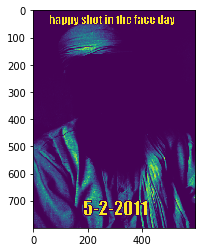

Output Text 
s the face day
y mh
---------------------------------------
Tesseract Ratio = 0.18604651162790697
Our Ratio = 0.5555555555555556



39
---------------------------------------
Actual Text
1 bomb every minute
---------------------------------------
Tesseract Prediction 
Ce
, 3 O
A 7 =. ) M2
. — nl
\ —. Th iN Ne con) \

---------------------------------------


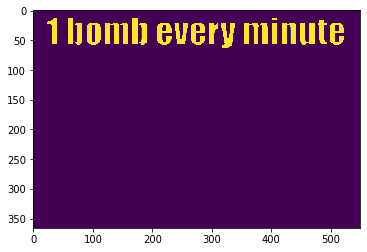

Output Text 
1Thombh every minute
---------------------------------------
Tesseract Ratio = 0.08695652173913043
Our Ratio = 0.8717948717948718



40
---------------------------------------
Actual Text
black power comes with a lot of responsibility
---------------------------------------
Tesseract Prediction 
ETI Cl a Ue
PTE es OS
. i

~

ri)\) } S|
oA
Mh HANI nt
NN iii .
a it Ne }

Ne rx SS ]

i / \\ eo

---------------------------------------


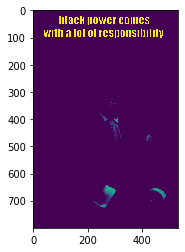

Output Text 
black nower comes
with a lot of responsibility
---------------------------------------
Tesseract Ratio = 0.2222222222222222
Our Ratio = 0.9565217391304348



41
---------------------------------------
Actual Text
that chiken is so black no one is going to eat it
---------------------------------------
Tesseract Prediction 
that CUT CTS So black
| le > a
i - }
Ht a i st a Aly eat it

---------------------------------------


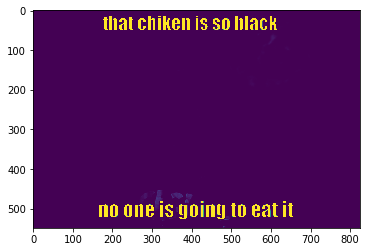

Output Text 
that chiken is so black
no one is going to eat it
---------------------------------------
Tesseract Ratio = 0.509090909090909
Our Ratio = 0.9795918367346939



42
---------------------------------------
Actual Text
i hope both teams lose
---------------------------------------
Tesseract Prediction 
» Lip y teams [OSe
a! ) és x
; yg) 7"!

---------------------------------------


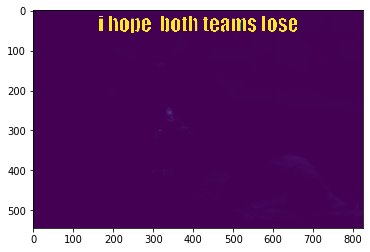

Output Text 
Ihope both teams lose
---------------------------------------
Tesseract Ratio = 0.3225806451612903
Our Ratio = 0.9302325581395349



43
---------------------------------------
Actual Text
say the damn pronouns
---------------------------------------
Tesseract Prediction 
1 a cy pronouns ;
a i

---------------------------------------


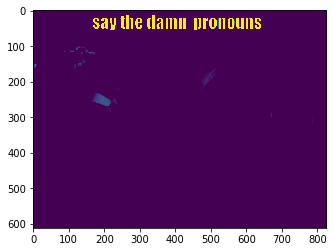

Output Text 
say the damn pronouns
---------------------------------------
Tesseract Ratio = 0.5
Our Ratio = 1.0



44
---------------------------------------
Actual Text
goin
---------------------------------------
Tesseract Prediction 
|

---------------------------------------


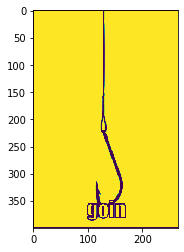

Output Text 

---------------------------------------
Tesseract Ratio = 0.0
Our Ratio = 0.0



45
---------------------------------------
Actual Text
we need problem solvers not racist and religious bigots in office
---------------------------------------
Tesseract Prediction 
BCC C ue Tacs
\ ~
Cx
a ”
- ,
=<
~~ Pd
- , Oa
J CHE racist anti eligious higots in CHS =

---------------------------------------


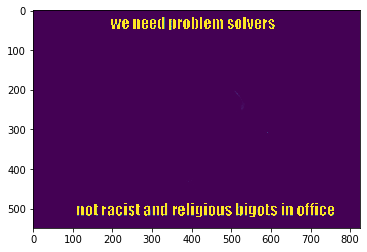

Output Text 
we eet  prolilem solvers
not racist and religious bigots in office
---------------------------------------
Tesseract Ratio = 0.45454545454545453
Our Ratio = 0.9312977099236641



46
---------------------------------------
Actual Text
officer down
---------------------------------------
Tesseract Prediction 
Oicer don

---------------------------------------


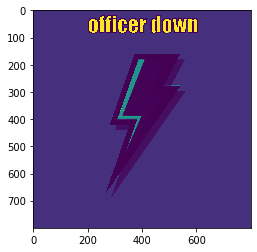

Output Text 
officer down
---------------------------------------
Tesseract Ratio = 0.6956521739130435
Our Ratio = 1.0



47
---------------------------------------
Actual Text
we said we would never forget why are you voting them into our government?
---------------------------------------
Tesseract Prediction 
ESOT Aaa el
8 |
HH
. ll
ENT
then nto ourgovernmént))

---------------------------------------


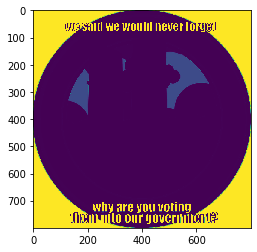

Output Text 
 Said we would never 
why are you voting
THEN Ito Our government
---------------------------------------
Tesseract Ratio = 0.375
Our Ratio = 0.7971014492753623



48
---------------------------------------
Actual Text
when a porn video features a tranny but then' she' turns out to be a midget too you had my curiosity but now you have my attention
---------------------------------------
Tesseract Prediction 
DEMON CTR Ce OCS Ue
TUT eS {Units (Outto he a mitlget too
OU MDA
TT BT cae my outuly
\ Pa
|
eel
ice

---------------------------------------


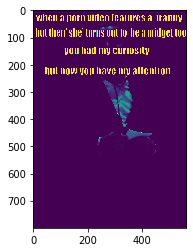

Output Text 
when a piorn video features a tranny
hut then  she  turns outto hea mnitlget too
you hat my curiosity
hut now you have my attention
y x 
---------------------------------------
Tesseract Ratio = 0.3203463203463203
Our Ratio = 0.8872180451127819



49
---------------------------------------
Actual Text
rep. dan crenshaw former navy seal decorated war hero literally lost an eye "doing something about terrorism" rep.ocasio-cortez former bartender supports socialism told dan crenshawn he should "do something about terrorism"
---------------------------------------
Tesseract Prediction 
Se
OT a EMSS ere
decorated =
. (.-'
fo
.
literally lostan eye
“doing something
, aboutterrorism"
y CG PNR GY
PUT ate
y la
Z y f WY
; My NS =
Aan TET | al
should “do something
PUSS

---------------------------------------


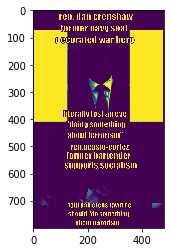

Output Text 
ren  dan crenshaw
former navy seal
tlecorated war herd
Iterally lost an eye
doing something
ahoutterrorisin 
ren ocasio cortez
former bartender
sunports socialism
tolil dain crenshawn he
shouli to something
about terrorism 
---------------------------------------
Tesseract Ratio = 0.48514851485148514
Our Ratio = 0.37668161434977576



50
---------------------------------------
Actual Text
nice watch must have cost an arm and a leg
---------------------------------------
Tesseract Prediction 
ss MeO MaeD
LY, Py 7 OP = ;
a Lips’ of! Sfx O ‘
RS ~
= Sh 8//
=a eS //
:
must have cost an aA ‘aileg}

---------------------------------------


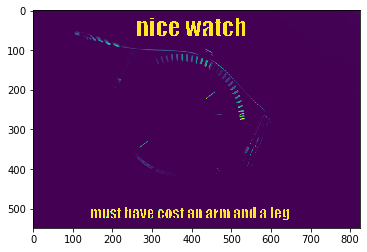

Output Text 
fice watch
must have cost an arm anita leg
---------------------------------------
Tesseract Ratio = 0.38620689655172413
Our Ratio = 0.9047619047619048



51
---------------------------------------
Actual Text
i'm sick of politics so here's a pic of michelle obama riding a unicorn
---------------------------------------
Tesseract Prediction 
PM Sick a? polities
@ \
é
J ‘
SOlaGS AMealimcialls
fobamalridingalunicorn

---------------------------------------


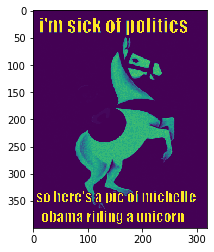

Output Text 
i nt sick of politics
so 4 pic of michelle
ohhama ritling a unicorn
---------------------------------------
Tesseract Ratio = 0.4794520547945205
Our Ratio = 0.8260869565217391



52
---------------------------------------
Actual Text
when you suck at photoshop
---------------------------------------
Tesseract Prediction 
when you suck at nhotoshon
7 e. aa.
4 id
~ OY y Y a
hk

---------------------------------------


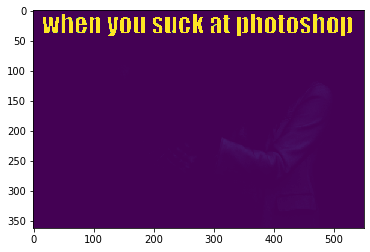

Output Text 
when you suck at photoshon
---------------------------------------
Tesseract Ratio = 0.5853658536585366
Our Ratio = 0.9615384615384616



53
---------------------------------------
Actual Text
for the last time.. i'm not michelle obama
---------------------------------------
Tesseract Prediction 
, AS, er
ps a,
AIUD HCA
Se id ‘SB -

---------------------------------------


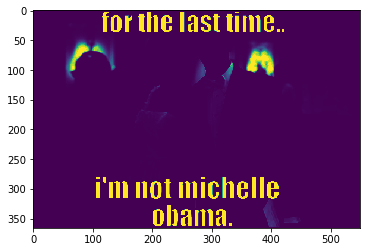

Output Text 
for the last time 
f La
im not michelle
obama 
---------------------------------------
Tesseract Ratio = 0.1518987341772152
Our Ratio = 0.8636363636363636



54
---------------------------------------
Actual Text
i'm cute
---------------------------------------
Tesseract Prediction 
im cute
a"
ro

---------------------------------------


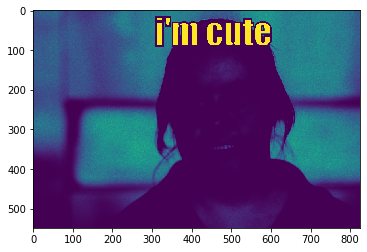

Output Text 

---------------------------------------
Tesseract Ratio = 0.6086956521739131
Our Ratio = 0.0



55
---------------------------------------
Actual Text
and then i told them you're going on a fun camping trip
---------------------------------------
Tesseract Prediction 
’ and thentold them
) ¢ ~* =~
, . )
i) e ae 77)
re >»
BM ed Ke
Se Se oe »

---------------------------------------


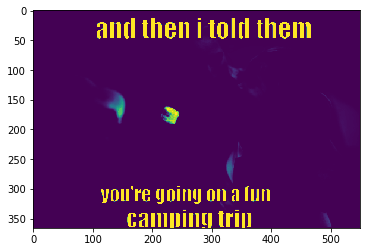

Output Text 
and then i told them
you re going onafun
camping trip
---------------------------------------
Tesseract Ratio = 0.36923076923076925
Our Ratio = 0.9259259259259259



56
---------------------------------------
Actual Text
the jussie smollett case explained. "how do you plead? " "innocent!!!" "black, gay, trump hater, friend of michelle obama
---------------------------------------
Tesseract Prediction 
the jussie smollett case explained,
Ly
TIOUTICTOR TT ee eC
Be
| ie.
“DRC CT ater,
ari eee CETTE

---------------------------------------


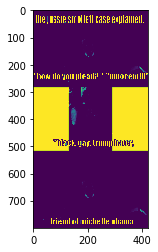

Output Text 
the jussie smollett case explained 
how lo you pleat?  innocent
BINTaCK  Way  Lrump natery
rien of michelle ohama
---------------------------------------
Tesseract Ratio = 0.44036697247706424
Our Ratio = 0.811965811965812



57
---------------------------------------
Actual Text
please consider donating water to children in need
---------------------------------------
Tesseract Prediction 
an NT ia
Pe ay = » a
considerdonating,
waterto children,inieed

---------------------------------------


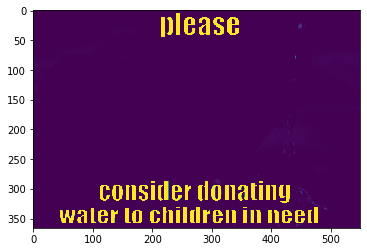

Output Text 
please
consider donating
water to children in need
---------------------------------------
Tesseract Ratio = 0.7017543859649122
Our Ratio = 0.96



58
---------------------------------------
Actual Text
you're a wizard motherfucker
---------------------------------------
Tesseract Prediction 
Tay |
|

& :
na

---------------------------------------


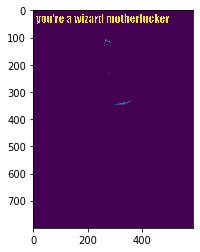

Output Text 
you re a wizard motherfucker
---------------------------------------
Tesseract Ratio = 0.13333333333333333
Our Ratio = 0.9642857142857143



59
---------------------------------------
Actual Text
relax mexicans you are rapists, drug lords and criminals
---------------------------------------
Tesseract Prediction 
relax MEeXICans
de wy a
Dele Tee Wg Seri Ti
pS

---------------------------------------


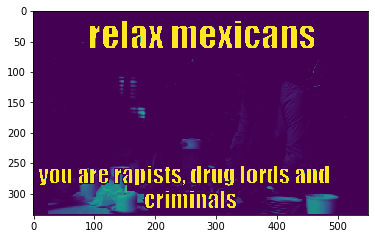

Output Text 
relax mexicans
you arerapists  drug lords and
F  criminals 
---------------------------------------
Tesseract Ratio = 0.4230769230769231
Our Ratio = 0.9217391304347826



60
---------------------------------------
Actual Text
hey look at me! i'm a serial pedofile
---------------------------------------
Tesseract Prediction 
ney iooK-atthnie!
| he
~~ Py. he
WABI MOTE:

---------------------------------------


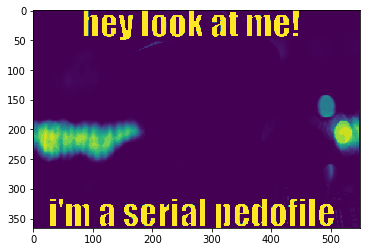

Output Text 
ney 100K at me 
ou 
ima serial pedotile
---------------------------------------
Tesseract Ratio = 0.34146341463414637
Our Ratio = 0.7368421052631579



61
---------------------------------------
Actual Text
when you just finished shooting a bunch of black kids but accidently killed a squirrel
---------------------------------------
Tesseract Prediction 
STA MSHEUISHOOUNG AR

UNncrOLhlackKiisihutiaccidentiykilled

aur ss
ae Srila : —s

af i : ened Lb

a ae zy?) a = .

---------------------------------------


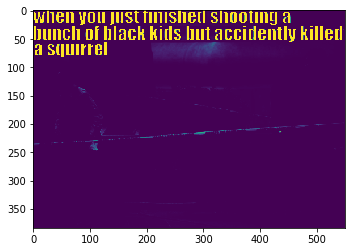

Output Text 
WHEN YOU JUSUIMNISHED Shooting a
bunch of black kits but accidently killed
a squirrel
---------------------------------------
Tesseract Ratio = 0.3069306930693069
Our Ratio = 0.7251461988304093



62
---------------------------------------
Actual Text
obama working to legalize medical cannabis for all of the usa
---------------------------------------
Tesseract Prediction 
tt
ne (an
Prt iiis

N ¥ - p= y

a oes

oe

qetical aad cL

---------------------------------------


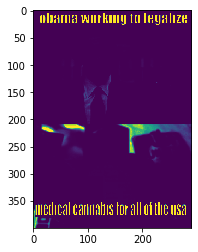

Output Text 
obama workiny to legalize
a  Tr
etc Carimabis for all of the usa
---------------------------------------
Tesseract Ratio = 0.18333333333333332
Our Ratio = 0.784



63
---------------------------------------
Actual Text
my wife just got a seashell tattoo on her inner thigh if you put your ear to it you can smell the ocean
---------------------------------------
Tesseract Prediction 
“Aaa
goo Ny Wile just got
“~ a seashell tattoo}
. . Sa ee Ses ape. ) al
Mer TT
oo
vo
a —_
J e =, "a .
ILVOUNUt Your eary7a
AW j o>
tojitiyoucan smell. y
THT RT 7

---------------------------------------


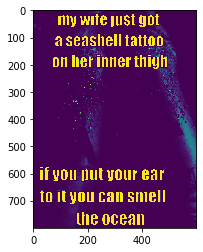

Output Text 
my wife just got
a seashell tattoo
on her inner thigh 
if you put your ear
to it you can smell
the ocean
---------------------------------------
Tesseract Ratio = 0.5112781954887218
Our Ratio = 0.9565217391304348



64
---------------------------------------
Actual Text
when you beat the shit out of the tranny hooker after you nut and call it a f****t but it doesn't get back up
---------------------------------------
Tesseract Prediction 
when you|heat the'shitoutoi the tranny—
POT eT CHAT MU eee
CA TALE SST Art Vee
| DB A Y
i _ *
~~

---------------------------------------


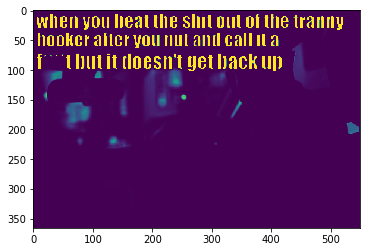

Output Text 
when you heat the shit out of the tranny
hooker after you nut and callita
f tut it doesn t get back up
co oe 
---------------------------------------
Tesseract Ratio = 0.43478260869565216
Our Ratio = 0.8807339449541285



65
---------------------------------------
Actual Text
ring ring hello? i've been waiting for your call all damn day!!!
---------------------------------------
Tesseract Prediction 
(fing ott hello?
\e y
” ot
TuelcenrEning tor
Fined
=
Pte TET ETE 1

---------------------------------------


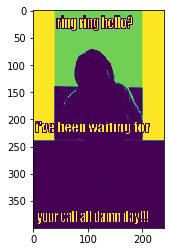

Output Text 
ninguna hello
Inve heen waiting to 
your call all tamin thay 
---------------------------------------
Tesseract Ratio = 0.3787878787878788
Our Ratio = 0.752



66
---------------------------------------
Actual Text
i like my refugees like this '' '' ''
---------------------------------------
Tesseract Prediction 
% Vane’
x A} =
SN . @ es
i  .
ee
PICT Tae
aS IGEES ULES a

---------------------------------------


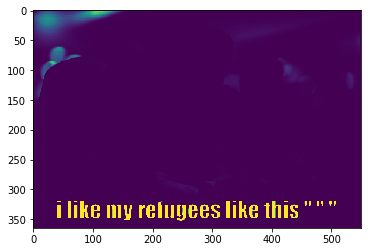

Output Text 
i like my refugees like this 
---------------------------------------
Tesseract Ratio = 0.20833333333333334
Our Ratio = 0.8787878787878788



67
---------------------------------------
Actual Text
when you get hungry you can either think about it or..
---------------------------------------
Tesseract Prediction 
UT a vu
Cal CMe? MIL AON MR Of.

---------------------------------------


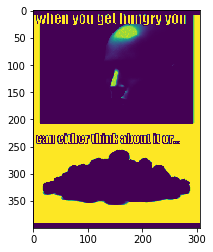

Output Text 
hen you get hungry you
ENTE Men TNE TL OULTO aS
---------------------------------------
Tesseract Ratio = 0.13793103448275862
Our Ratio = 0.5544554455445545



68
---------------------------------------
Actual Text
what's the difference between a jew and a pizza? a pizza doesn't scream when you put it in the oven
---------------------------------------
Tesseract Prediction 
Sr ies erat
i i TON
Is i G28 ebe \
eo ae |)
ORS!
ee Shee »
a i
ae
7
= rr oe

---------------------------------------


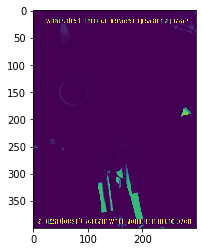

Output Text 
atlas uler eve es areal
Amadis tloest scream ene  dun the geen
---------------------------------------
Tesseract Ratio = 0.17045454545454544
Our Ratio = 0.36024844720496896



69
---------------------------------------
Actual Text
taking photo with a mosque
---------------------------------------
Tesseract Prediction 
ELT TOO MT a moSsTne

| t
a ae ee
ag Pee \ > ad

---------------------------------------


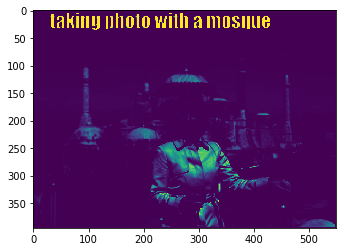

Output Text 
taking photo with a mosque
 Ae
ta 
---------------------------------------
Tesseract Ratio = 0.24
Our Ratio = 0.8666666666666667



70
---------------------------------------
Actual Text
"ay, tone. how'd da gas stay in if da door is made of wood?"
---------------------------------------
Tesseract Prediction 
SEU all
TEST eTOCs
iSMalejOf WOO Pins)
pS | =:
Peer TT Te ke: SS ettststStSsSSs

---------------------------------------


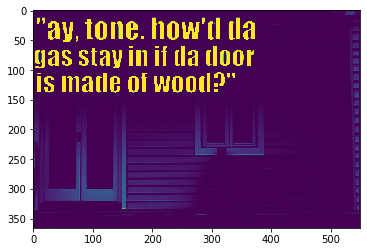

Output Text 
ay  tone  how d tla
yas Stay in if da door
is mate of woot? 
---------------------------------------
Tesseract Ratio = 0.0851063829787234
Our Ratio = 0.8



71
---------------------------------------
Actual Text
what do i have in common with cow pies? the older we get, the easier for you to pick us up!
---------------------------------------
Tesseract Prediction 
what do f hawe 1 common with ies
(the older we Oat, the casiet for you to piel us up

---------------------------------------


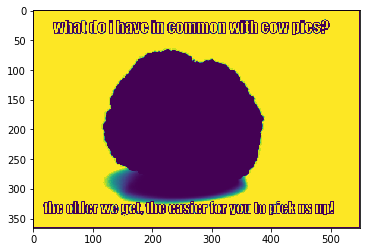

Output Text 
Wwhationfavelmicommonwitiicows ites 4
---------------------------------------
Tesseract Ratio = 0.8248587570621468
Our Ratio = 0.40625



72
---------------------------------------
Actual Text
running chocolate
---------------------------------------
Tesseract Prediction 
hunningehocolate
\
»
A Ths

---------------------------------------


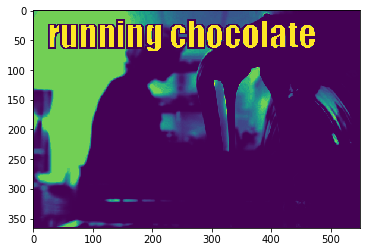

Output Text 
Kunming Chocolate
wi 4
 YN
---------------------------------------
Tesseract Ratio = 0.6222222222222222
Our Ratio = 0.6511627906976745



73
---------------------------------------
Actual Text
imagine, if you will an entire country so ignorant that the people wilfully give billions of dollars in order to elect rich criminals to rule over their lives and steal their money, but believe they are free
---------------------------------------
Tesseract Prediction 
TEIN, aOR TT
WS
eo
6 <p
. Y 4
i 4 ¢
an entire country so ra Aa
wiliully give billions of dollarsunorder to
electirich criminals to rule over ua
and steal their money, but believe they’are free.

---------------------------------------


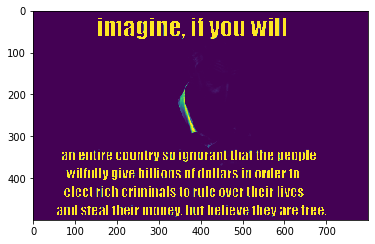

Output Text 
Imagine  if you will
an entire country so ignorant that the people
wilfully give billions of dollars in order to
elect rich criminals to rule over their lives
and steal their money  hut believe they are free 
---------------------------------------
Tesseract Ratio = 0.7512437810945274
Our Ratio = 0.8481927710843373



74
---------------------------------------
Actual Text
im never doing a garden again!
---------------------------------------
Tesseract Prediction 
in Hever doing
- . ‘ = gh
ee Sa Ys Rae i

---------------------------------------


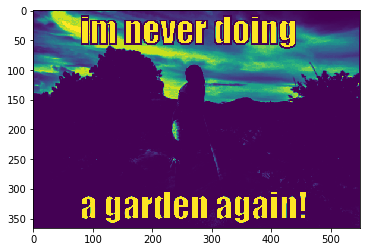

Output Text 
Mijnever doing 
a garden again 
---------------------------------------
Tesseract Ratio = 0.5277777777777778
Our Ratio = 0.8852459016393442



75
---------------------------------------
Actual Text
coming soon to your neighborhood 300,000 islamic heathens demanding the usa change to suit thier sick religion
---------------------------------------
Tesseract Prediction 
comingsoon to\yourneighborhoot
: —_ y= 3 3
300,000 islamic heathens demanting the usa change
to suit thier sick religion

---------------------------------------


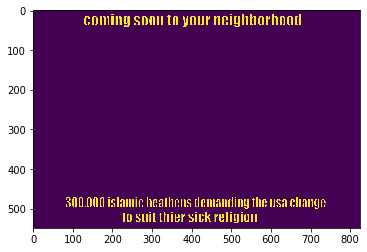

Output Text 
coming soon to your neighborhood
300 000 islamic heathens demanting the usa change
to suit thier sick religion
---------------------------------------
Tesseract Ratio = 0.896551724137931
Our Ratio = 0.9636363636363636



76
---------------------------------------
Actual Text
listen bitch, before you start fucking with me you should know my team is bigger
---------------------------------------
Tesseract Prediction 
listen hitch, before you.
SEC CLR LL aa
if AN
; = | Y Ay A. y
y “i " \
t/a ‘SN \,
ah <M |
teas
vy \
Woe
y} Ma q ;
hb SUT C NR inY
ler CTU eae a

---------------------------------------


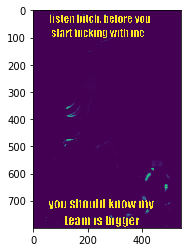

Output Text 
listen bitch  before you
start fucking with me
you should know tly
team is bigger
---------------------------------------
Tesseract Ratio = 0.3377777777777778
Our Ratio = 0.9316770186335404



77
---------------------------------------
Actual Text
masturbation it's not just for men
---------------------------------------
Tesseract Prediction 
masturbation
Oe
Y)
wv
SY,
IES NOtjust formen

---------------------------------------


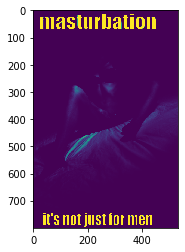

Output Text 
masturbation
it s not just for men
---------------------------------------
Tesseract Ratio = 0.625
Our Ratio = 0.9411764705882353



78
---------------------------------------
Actual Text
what is this sleep of which you speak?
---------------------------------------
Tesseract Prediction 
at is this sleep
| r
7,
of Which you
Sueake

---------------------------------------


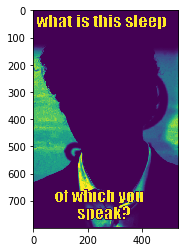

Output Text 
whatis this sleep
of which you
snigak 
---------------------------------------
Tesseract Ratio = 0.7469879518072289
Our Ratio = 0.8421052631578947



79
---------------------------------------
Actual Text
oakland mayor libby schaaf i saved 800 ms-13 rapists, murderers, molesters from ice
---------------------------------------
Tesseract Prediction 
ORR UT TEL
libbwsehaat
™
wel
oo
SC LI
ms-13,rapists,
MUU EAU Cbs
A A

---------------------------------------


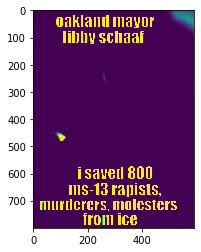

Output Text 
oaklani mayor 
lihhy schaat
I saved 800
ms 13 rapists 
murderers  molesters
fromice
---------------------------------------
Tesseract Ratio = 0.35294117647058826
Our Ratio = 0.8554216867469879



80
---------------------------------------
Actual Text
what if i told you that you cant "tolerate" a person who agrees with you? "
---------------------------------------
Tesseract Prediction 
wy P
= p |
nee”

---------------------------------------


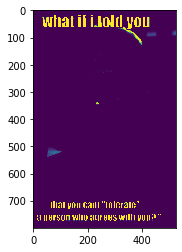

Output Text 
what if Moll you
that you cant tolerate 
aperson who agrees with you? 
---------------------------------------
Tesseract Ratio = 0.15217391304347827
Our Ratio = 0.9103448275862069



81
---------------------------------------
Actual Text
look both ways before you cross the street
---------------------------------------
Tesseract Prediction 
tt »]
Lad,

---------------------------------------


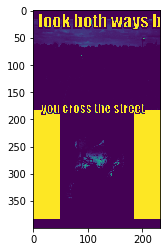

Output Text 
look hoth ways D
 the 
---------------------------------------
Tesseract Ratio = 0.07407407407407407
Our Ratio = 0.59375



82
---------------------------------------
Actual Text
what kind of punch can take out 20 kids and 6 adults? a sandy hook
---------------------------------------
Tesseract Prediction 
wiliat iid of paneh can take ont
20 itisand 6 atinits2
i |
I
€) Seana OWL

---------------------------------------


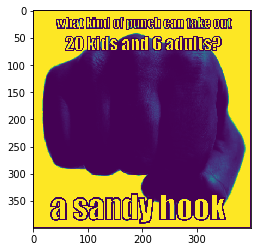

Output Text 
furan onUne eum TReyOU
aS an iwhook
---------------------------------------
Tesseract Ratio = 0.5957446808510638
Our Ratio = 0.33663366336633666



83
---------------------------------------
Actual Text
she said "choke me daddy" so i gave her 2 popeye's biscuits without a drink
---------------------------------------
Tesseract Prediction 
she said "choke me daddy"
- Ne oe —
—_ te S Ba
sorgavel ee ZA VON S| ISGUILS
without a drink ——

---------------------------------------


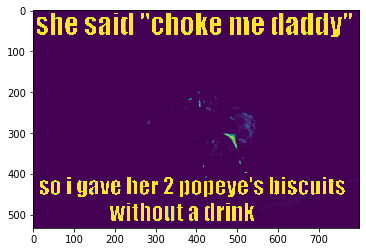

Output Text 
She said choke me daddy 
So i gave her 2 nopeye s biscuits
without a drink
---------------------------------------
Tesseract Ratio = 0.6162790697674418
Our Ratio = 0.912751677852349



84
---------------------------------------
Actual Text
meditation before going to school
---------------------------------------
Tesseract Prediction 
metitation betore
going to schoo!

---------------------------------------


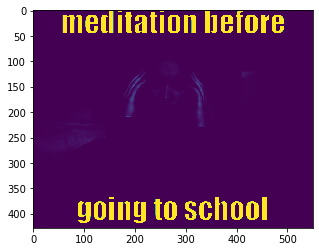

Output Text 
meditation erore
going to school
---------------------------------------
Tesseract Ratio = 0.8529411764705882
Our Ratio = 0.9230769230769231



85
---------------------------------------
Actual Text
we can kill as many as we want and your stupid government keeps bringing us in
---------------------------------------
Tesseract Prediction 
CECH UES many as MA ENC Nt AUTH government
Keens bringing us in
S P =
- . . :
e \ ea 2
\ Ye
\ '
7 ee
5 , wi / <= .

---------------------------------------


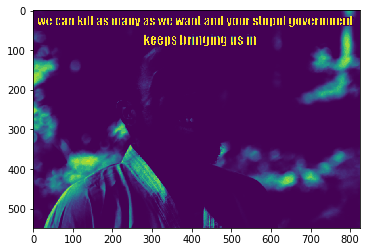

Output Text 
we can kill as many as we want and your stupid yovernment
keeps ringing us in
---------------------------------------
Tesseract Ratio = 0.4329896907216495
Our Ratio = 0.967741935483871



86
---------------------------------------
Actual Text
so there is this new implant that can actually fix stupid
---------------------------------------
Tesseract Prediction 
So thereis
(iis new implant
that can
aca iii stupii

---------------------------------------


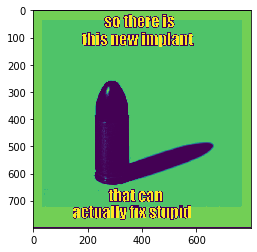

Output Text 
so thesis
fis new ipl
thralcan
AGIUAIVIKESTUNIT
---------------------------------------
Tesseract Ratio = 0.7636363636363637
Our Ratio = 0.46153846153846156



87
---------------------------------------
Actual Text
if you're vaping inside a mcdonalds, inside a walmart ... that's the turducken of white trash
---------------------------------------
Tesseract Prediction 
Torte mM isiie
aimetlonaltssinsideawalmar
f WAL* MART é
vy Veg ae

---------------------------------------


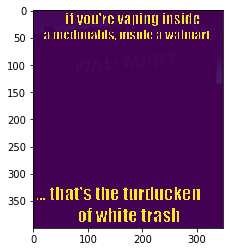

Output Text 
if you re vaning inside
amcdonalis  inside a walmart
 That s the turducken
of white trash
---------------------------------------
Tesseract Ratio = 0.3125
Our Ratio = 0.8791208791208791



88
---------------------------------------
Actual Text
this cat is pushing a watermelon out of a lake. your argument is invalid
---------------------------------------
Tesseract Prediction 
this cat is pushing a watermelon out of a lake.
your, ELTA is invalid.
GF
2 i <
a ; i
#
” ee ai er 7) ¥

---------------------------------------


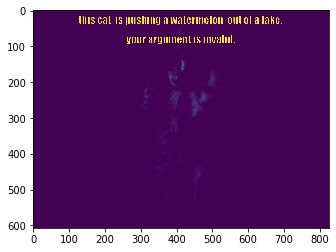

Output Text 
this cat is pushing a watermelon out of a lake 
your argument is invalitl 
---------------------------------------
Tesseract Ratio = 0.711864406779661
Our Ratio = 0.958904109589041



89
---------------------------------------
Actual Text
what do you call a retarded jew? auschwistic
---------------------------------------
Tesseract Prediction 
whatdoyoulcallajretartedjew>
c ? 2s
2 “a ~ 7
a Wad € a
SAY 488 i j
. Ue
s : i oy ,
eT Se

---------------------------------------


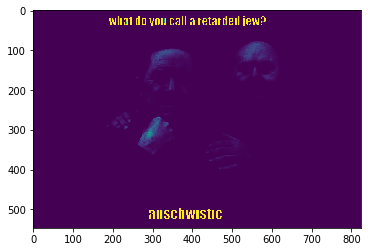

Output Text 
what do you calla retarded jew?
auschwistic
---------------------------------------
Tesseract Ratio = 0.43283582089552236
Our Ratio = 0.9655172413793104



90
---------------------------------------
Actual Text
that blackened chicken was so dry it reminded me of your mother
---------------------------------------
Tesseract Prediction 
that blackened chicken RES SUT
aR
ri ea MN

---------------------------------------


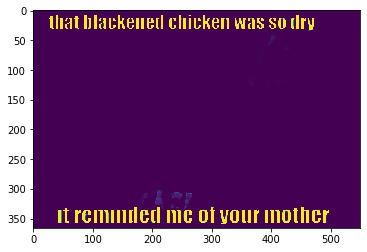

Output Text 
that blackened chicken was so dry
it reminded me of your mother
---------------------------------------
Tesseract Ratio = 0.48598130841121495
Our Ratio = 0.9841269841269841



91
---------------------------------------
Actual Text
yo dawg, i heard you like memes  so i made a meme mocking memes you so you can can mock me knocking memes while reading mock memes
---------------------------------------
Tesseract Prediction 
Vo dawg) heartiyou like
memes
h = a ~~
~~ ‘ws
ANTM SUSU M cay UI) NTP
Aa mre ick memes

---------------------------------------


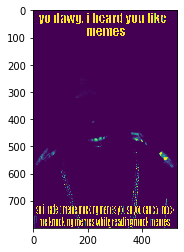

Output Text 
yo dawg  i heard you like
inemes
? sy
spimiade a meme mocking ees you sojucarcarmock
me Kilocking memes while readlint  mock meres
---------------------------------------
Tesseract Ratio = 0.44954128440366975
Our Ratio = 0.8307692307692308



92
---------------------------------------
Actual Text
when everybody's worried about their ex but you're just here enjoying your lemonade
---------------------------------------
Tesseract Prediction 
ee
ei
ae |
© }
oY a
TI Ee NOMA eOTATTS

---------------------------------------


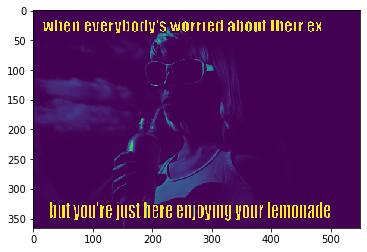

Output Text 
when everyhotly sworried about their ex
tos
hut you re just here enjoyiliy your lemonatle
---------------------------------------
Tesseract Ratio = 0.04878048780487805
Our Ratio = 0.8488372093023255



93
---------------------------------------
Actual Text
cannibal tribe from indonesia will take muslim refugess in any amount
---------------------------------------
Tesseract Prediction 
TU Lied MOTT Ue)
ETS ca ass
Fi oe = ;
yee — ‘
fan ae
=e
NTT MTU tea

---------------------------------------


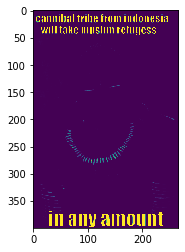

Output Text 
Camutial tate tram nuonesta
will take mushin refuyess
inany amount
---------------------------------------
Tesseract Ratio = 0.2463768115942029
Our Ratio = 0.7555555555555555



94
---------------------------------------
Actual Text
when you see the gas bill
---------------------------------------
Tesseract Prediction 
Tien Gan
theigashill

---------------------------------------


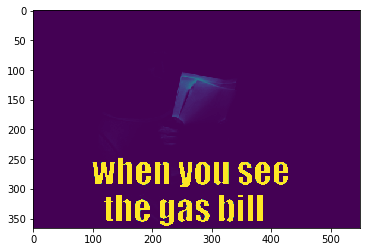

Output Text 
when you see
the gas bill
---------------------------------------
Tesseract Ratio = 0.5106382978723404
Our Ratio = 0.96



95
---------------------------------------
Actual Text
cheers to all the people who can change their minds when presented with information that contradicts their beliefs
---------------------------------------
Tesseract Prediction 
#)\cheersito allitheineonter }
RELY Noy a Ys Ny | t
oS BS I

Ml phe > «& ( cf dy 1.)
ii J ) ¢ ' i} |’
\ oe Lee KM lat
AUT MAL hy
of) (ito em cianoatie minds ; it } |
tie CS Te iP | i]
LA 1a Armenia nett PTs |

---------------------------------------


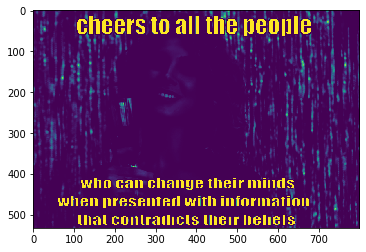

Output Text 
  a at YO
 Cheers to all tlie people
 ot t 
who can change their minds
when presented with information 3
that contradicts their beliefs 
---------------------------------------
Tesseract Ratio = 0.12962962962962962
Our Ratio = 0.888



96
---------------------------------------
Actual Text
broken chair
---------------------------------------
Tesseract Prediction 
rokeh chalr
be a
(i,

---------------------------------------


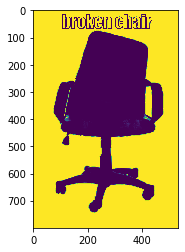

Output Text 

---------------------------------------
Tesseract Ratio = 0.5294117647058824
Our Ratio = 0.0



97
---------------------------------------
Actual Text
stop being a bitch
---------------------------------------
Tesseract Prediction 
stop heig
Ca
=
i}
a
=) "4
~ Beige |

---------------------------------------


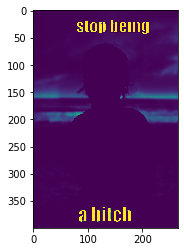

Output Text 
stop heing
ahiteh
---------------------------------------
Tesseract Ratio = 0.4
Our Ratio = 0.7428571428571429



98
---------------------------------------
Actual Text
honestly how often do you masturbate?
---------------------------------------
Tesseract Prediction 
honestly
, ]
Yeo
x ve E
Pe WESC? je

---------------------------------------


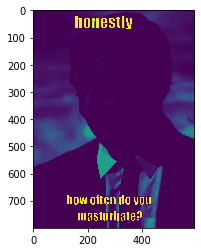

Output Text 
honestly
how often slo you
masturbate? ZL
---------------------------------------
Tesseract Ratio = 0.43243243243243246
Our Ratio = 0.8717948717948718



99
---------------------------------------
Actual Text
spending quality time with dad
---------------------------------------
Tesseract Prediction 
SPENUING UATE WII atl
| it,
Eg \/ y.
At ~
=a
ary

---------------------------------------


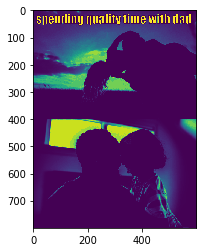

Output Text 
spentling quality time with dad
 Le 
---------------------------------------
Tesseract Ratio = 0.125
Our Ratio = 0.8787878787878788



100


In [6]:
with open('./data/train.jsonl', 'r') as json_file:
    json_list = list(json_file)

accuracies = []
tess_accuracies = []
for count, json_str in enumerate(json_list):
    result = json.loads(json_str)
    print("---------------------------------------")
    print("Actual Text\n" + result["text"])
    if len(str(result["id"])) == 4:
        image_path = "./data/img/0" + str(result["id"]) + ".png"
    else:
        image_path = "./data/img/" + str(result["id"]) + ".png"
    x = pytesseract.image_to_string(image_path, lang='eng', config='--psm 6')
    print("---------------------------------------")
    print("Tesseract Prediction \n" + x)
    print("---------------------------------------")
    img = cv2.imread(image_path)
    output_text = process(img)
    print("Output Text \n" + output_text)
    print("---------------------------------------")
    orig_text = result["text"]
    counter = 0
    wrong_counter = 0
    for i, char in enumerate(orig_text):
        counter += 1
        if i < len(output_text):
            if char != output_text[i]:
                wrong_counter += 1
        else:
            wrong_counter += 1

    ratio = SequenceMatcher(None, orig_text, output_text).ratio()
    ratio1 = SequenceMatcher(None, orig_text, x).ratio()

    print("Tesseract Ratio = " + str(ratio1))
    print("Our Ratio = " + str(ratio))
    print("\n\n")
    accuracies.append(ratio)
    tess_accuracies.append(ratio1)
    print(count)


In [7]:
# print(accuracies)
print(sum(accuracies) / len(accuracies))
print(statistics.median(accuracies))
# print(tess_accuracies)
print(sum(tess_accuracies) / len(tess_accuracies))
print(statistics.median(tess_accuracies))

0.7933225624953513
0.8791208791208791
0.39120126942769584
0.3875968992248062
